In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


### How correlated at the MHC-I and MHC-II scores?

In [3]:
classI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv', index_col=0)
classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv', index_col=0)

In [4]:
patients = list(classI.index)
mutations = list(classI.columns)

In [5]:
classI.head()

,EGFR_ifd_55174772,NOTCH1_ifd_136518618,PIK3R1_ifd_68295304,CTNNB1_ifd_41224643,PIK3R1_ifd_68293795,ERBB2_ifi_39724728,EGFR_ifd_55174773,PIK3R1_ifd_68293758,TP53_ifd_7675066,BRAF_ifd_140778037,...,THRAP3_R504W,KMT2C_W430C,KMT2B_R1597Q,PIK3R1_L573P,KMT2C_D4425Y,TCF12_R589H,TP53_A161D,KEAP1_V155F,NF1_P1990Q,TP53_I254S
TCGA-02-0003,8.192318,12.610138,0.561641,4.660101,14.391665,0.220919,4.281047,14.003648,5.115616,2.589041,...,12.627785,16.526459,7.236090,0.939944,1.636364,20.198295,3.536356,0.336606,0.356552,0.131961
TCGA-02-0033,7.402495,2.895448,2.525261,0.610539,10.076580,1.043046,2.391201,4.878120,2.572530,2.110847,...,11.345070,5.132615,3.218709,4.645128,0.475590,7.233886,1.730472,0.312188,2.058811,0.441847
TCGA-02-0047,7.439759,8.762255,6.725895,1.471782,15.400653,0.205625,2.544861,14.577646,11.253003,0.173633,...,34.055701,19.521127,4.700519,4.444964,1.043478,15.865278,2.907045,0.442105,2.934783,2.151394
TCGA-02-0055,2.047533,1.854651,10.074397,0.443036,0.957902,1.208768,0.980926,4.407298,0.666515,3.246911,...,3.579627,3.434619,11.010495,2.290909,0.160612,6.887191,0.447077,1.929064,1.627907,1.172414
TCGA-02-2466,1.980968,1.614350,1.907821,1.275458,8.178074,1.027902,1.368945,0.719084,1.491943,0.968920,...,10.348993,3.569482,8.524514,2.527537,0.518110,6.831963,0.503793,0.313840,0.117139,0.308923


In [6]:
classII.head()

,EGFR_ifd_55174772,NOTCH1_ifd_136518618,PIK3R1_ifd_68295304,CTNNB1_ifd_41224643,PIK3R1_ifd_68293795,ERBB2_ifi_39724728,EGFR_ifd_55174773,PIK3R1_ifd_68293758,TP53_ifd_7675066,BRAF_ifd_140778037,...,THRAP3_R504W,KMT2C_W430C,KMT2B_R1597Q,PIK3R1_L573P,KMT2C_D4425Y,TCF12_R589H,TP53_A161D,KEAP1_V155F,NF1_P1990Q,TP53_I254S
TCGA-02-0003,52.265148,56.269861,10.124055,16.146696,53.128962,6.504687,31.568967,49.411595,65.855779,16.868111,...,90.551932,36.163855,30.522680,16.957071,8.546171,57.066392,25.802002,1.657148,13.551839,24.979903
TCGA-02-0033,41.109568,54.584064,8.700333,10.915331,50.766368,4.679077,34.554166,39.605204,49.100719,12.395997,...,81.357355,39.345444,34.158635,16.463908,10.728105,51.848827,24.626291,3.958570,12.091341,19.775829
TCGA-02-0047,40.581706,52.407053,1.335247,35.908051,46.318500,9.158061,25.831526,42.206977,60.318532,20.422887,...,88.890588,40.878284,29.899641,6.120444,7.743398,21.622955,32.352890,6.297456,7.202481,14.504534
TCGA-02-0055,37.016468,47.393696,9.443025,6.987636,53.821494,3.541421,34.511942,41.664306,53.320312,15.040540,...,76.286698,28.455277,35.864529,17.568790,9.126550,55.137451,27.369899,6.801003,11.527486,32.103563
TCGA-02-2466,43.621347,55.362139,1.331266,88.457888,47.980304,8.590443,33.891398,41.654599,64.150143,13.114090,...,92.017937,56.103928,27.747990,5.910957,6.363041,21.342708,38.857573,3.318297,7.029991,20.082977


In [7]:
patient_correlations = []
for patient in patients:
    patient_correlations.append(sp.spearmanr(classI.ix[patient], classII.ix[patient])[0])

In [8]:
pd.Series(patient_correlations).describe()

count    5942.000000
mean        0.390995
std         0.054049
min         0.198816
25%         0.353502
50%         0.392344
75%         0.428519
max         0.551925
dtype: float64

In [9]:
sns.set_style('white')

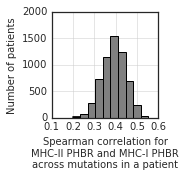

In [13]:
plt.figure(figsize=(2.5, 2.5))
pd.Series(patient_correlations).hist(color='grey')
plt.xlabel('Spearman correlation for\nMHC-II PHBR and MHC-I PHBR\nacross mutations in a patient')
plt.ylabel('Number of patients')
plt.locator_params(nbins=6)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/correlation.conservative.pdf')

In [11]:
mutation_correlations = []
for mutation in mutations:
    mutation_correlations.append(sp.spearmanr(classI.ix[:, mutation], classII.ix[:, mutation])[0])

In [12]:
pd.Series(mutation_correlations).describe()

count    1018.000000
mean        0.001176
std         0.076706
min        -0.297695
25%        -0.047869
50%        -0.003467
75%         0.054537
max         0.299298
dtype: float64

In [26]:
np.log(10)

2.3025850929940459

All values

In [7]:
def get_values_from_df(df):
    values = []
    for a in df.values:
        values.extend(a)
    return values

In [12]:
sp.spearmanr(pd.Series(get_values_from_df(classI)), pd.Series(get_values_from_df(classII)))

SpearmanrResult(correlation=0.35836290673960336, pvalue=0.0)